# Importing the neccesary libraries

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Reading in a csv

In [4]:
df = pd.read_csv('movie_metadata.csv')

In [87]:
# Making sure to check what the dataframe looks like
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [ ]:
# Seeing the quanitiy of columns and rows
df.shape

In [ ]:
df.index

In [555]:
# Identifying the columns we are working with, 
# so we may call them up later
df.columns
len(df.columns)

28

In [ ]:
# Lets check the datatype for our columns 
# and also identify if they have any missing values(NaN)
# We can also see the number of 'objects', 'floats' and 'integers'
df.info()

# Data Cleaning!

In [6]:
# Since we are checking for profits and best rating movies. 
# We do not need the names of the directors, actors or likes

clean_df = df.drop(columns=['director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'movie_imdb_link', 'color', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'facenumber_in_poster', 'director_name', 'cast_total_facebook_likes', 'movie_facebook_likes', 'language', 'aspect_ratio'])

In [7]:
# After making dropping some columns that we don't need
# we need to check if our dataframe has been updated.
len(clean_df.columns)

13

In [90]:
clean_df

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre
0,723.0,178.0,760505847.0,Action,Avatar,886204,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9,Action
1,302.0,169.0,309404152.0,Action,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,7.1,Action
2,602.0,148.0,200074175.0,Action,Spectre,275868,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,6.8,Action
3,813.0,164.0,448130642.0,Action,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,8.5,Action
4,0.0,0.0,0.0,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,0,0.0,0,0,0.0,0.0,7.1,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,0.0,Comedy,Signed Sealed Delivered,629,fraud|postal worker|prison|theft|trial,6.0,Canada,0,0.0,2013.0,7.7,Action
5039,43.0,43.0,0.0,Crime,The Following,73839,cult|fbi|hideout|prison escape|serial killer,359.0,USA,TV-14,0.0,0.0,7.5,Action
5040,13.0,76.0,0.0,Drama,A Plague So Pleasant,38,0,3.0,USA,0,1400.0,2013.0,6.3,Action
5041,14.0,100.0,10443.0,Comedy,Shanghai Calling,1255,0,9.0,USA,PG-13,0.0,2012.0,6.3,Action


In [11]:
# Sorting our dataframe gross from highest to lowest
# We want to organize this so we can work with it later
def sort_values(dataframe, column, n):
    '''
    dataframe expects a DataFrame or DataFrame variable
    column expects a string of a column that will be sorted
    n expects 1 or 0 to apply Ascending= (True or False)
    Returns DataFrame with new sorted column in DataFrame
    
    
    '''
    return dataframe.sort_values(by=[column], ascending = n)
    

In [13]:
sort_values(clean_df, 'gross', 0)

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9
26,315.0,194.0,658672302.0,Drama|Romance,Titanic,793059,artist|love|ship|titanic|wet,2528.0,USA,PG-13,200000000.0,1997.0,7.7
29,644.0,124.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Jurassic World,418214,dinosaur|disaster film|experiment gone wrong|j...,1290.0,USA,PG-13,150000000.0,2015.0,7.0
794,703.0,173.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,995415,alien invasion|assassin|battle|iron man|soldier,1722.0,USA,PG-13,220000000.0,2012.0,8.1
17,703.0,173.0,623279547.0,Action|Adventure|Sci-Fi,The Avengers,995415,alien invasion|assassin|battle|iron man|soldier,1722.0,USA,PG-13,220000000.0,2012.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5032,10.0,98.0,NaN,Crime|Drama,Bang,438,corruption|homeless|homeless man|motorcycle|ur...,14.0,USA,NaN,NaN,1995.0,6.4
5036,NaN,84.0,NaN,Crime|Drama,The Mongol King,36,jewell|mongol|nostradamus|stepnicka|vallone,1.0,USA,PG-13,3250.0,2005.0,7.8
5038,1.0,87.0,NaN,Comedy|Drama,Signed Sealed Delivered,629,fraud|postal worker|prison|theft|trial,6.0,Canada,NaN,NaN,2013.0,7.7
5039,43.0,43.0,NaN,Crime|Drama|Mystery|Thriller,The Following,73839,cult|fbi|hideout|prison escape|serial killer,359.0,USA,TV-14,NaN,NaN,7.5


In [27]:

clean_df.isna().sum()

num_critic_for_reviews    0
duration                  0
gross                     0
genres                    0
movie_title               0
num_voted_users           0
plot_keywords             0
num_user_for_reviews      0
country                   0
content_rating            0
budget                    0
title_year                0
imdb_score                0
dtype: int64

In [14]:
def replace_data(dataframe, column, n, type_):
    """
    dataframge expects a dataframe type to work with
    column expects a name of a column from that dataframe
    n expects what you want to fill in the Na with
    type_ expect your to state what datatype the n will be once replaced
    """
    dataframe[column] = dataframe[column].fillna(n).astype(type_)
    return dataframe

In [26]:
replace_data(clean_df, 'budget', '0', str)

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,avatar|future|marine|native|paraplegic,3054.0,USA,PG-13,237000000.0,2009.0,7.9
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,1238.0,USA,PG-13,300000000.0,2007.0,7.1
2,602.0,148.0,200074175.0,Action|Adventure|Thriller,Spectre,275868,bomb|espionage|sequel|spy|terrorist,994.0,UK,PG-13,245000000.0,2015.0,6.8
3,813.0,164.0,448130642.0,Action|Thriller,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,2701.0,USA,PG-13,250000000.0,2012.0,8.5
4,0,0,0,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,0,0,0,0,0,0,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,0,Comedy|Drama,Signed Sealed Delivered,629,fraud|postal worker|prison|theft|trial,6.0,Canada,0,0,2013.0,7.7
5039,43.0,43.0,0,Crime|Drama|Mystery|Thriller,The Following,73839,cult|fbi|hideout|prison escape|serial killer,359.0,USA,TV-14,0,0,7.5
5040,13.0,76.0,0,Drama|Horror|Thriller,A Plague So Pleasant,38,0,3.0,USA,0,1400.0,2013.0,6.3
5041,14.0,100.0,10443.0,Comedy|Drama|Romance,Shanghai Calling,1255,0,9.0,USA,PG-13,0,2012.0,6.3


In [73]:
clean_df.to_csv('clean_df.csv', index=False)

In [65]:
clean_df = pd.read_csv('clean_df.csv')

In [189]:
def data_cleaning(dataframe, column, z):
    """
    dataframe expects a dataframe variable to clean up
    column expects a column from dataframe that is inputed in  
    z expects a symbol/word/letter to replace (z, "") -> " "
    
    returns modified dataframe
    """
    dataframe[column] = dataframe[column].str.replace(z, ", ")
    return dataframe

In [ ]:
# We are replacing the | from genres out with a comma
data_cleaning(clean_df, ['genres'], "|")

In [ ]:
clean_df['genres'] = clean_df['genres'].str.split(' ').str[0]

In [199]:
# Changing all floats into integers so it is more organized and clean
clean_df['gross'] = clean_df['gross'].astype(int)
clean_df['num_critic_for_reviews'] = clean_df['num_critic_for_reviews'].astype(int)
clean_df['duration'] = clean_df['duration'].astype(int)
clean_df['title_year'] = clean_df['title_year'].astype(int)
clean_df['budget'] = clean_df['budget'].astype(int)
clean_df['num_user_for_reviews'] = clean_df['num_user_for_reviews'].astype(int)
clean_df['duration'] = clean_df['duration'].astype(int)

In [321]:
clean_df

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre
0,723,178,760505847,Action,Avatar,886204,avatar|future|marine|native|paraplegic,3054,USA,PG-13,237000000,2009,7.9,Action
1,302,169,309404152,Action,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,1238,USA,PG-13,300000000,2007,7.1,Action
2,602,148,200074175,Action,Spectre,275868,bomb|espionage|sequel|spy|terrorist,994,UK,PG-13,245000000,2015,6.8,Action
3,813,164,448130642,Action,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,2701,USA,PG-13,250000000,2012,8.5,Action
4,0,0,0,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,0,0,0,0,0,0,7.1,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,87,0,Comedy,Signed Sealed Delivered,629,fraud|postal worker|prison|theft|trial,6,Canada,0,0,2013,7.7,Action
5039,43,43,0,Crime,The Following,73839,cult|fbi|hideout|prison escape|serial killer,359,USA,TV-14,0,0,7.5,Action
5040,13,76,0,Drama,A Plague So Pleasant,38,0,3,USA,0,1400,2013,6.3,Action
5041,14,100,10443,Comedy,Shanghai Calling,1255,0,9,USA,PG-13,0,2012,6.3,Action


# The Top 500 Genres

# Most Frequent Genre (Top 500)

In [318]:
clean_df.to_csv('clean_df.csv', index=False)

In [323]:
pd.read_csv("clean_df.csv")

,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,genre
0,723,178,760505847,Action,Avatar,886204,avatar|future|marine|native|paraplegic,3054,USA,PG-13,237000000,2009,7.9,Action
1,302,169,309404152,Action,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,1238,USA,PG-13,300000000,2007,7.1,Action
2,602,148,200074175,Action,Spectre,275868,bomb|espionage|sequel|spy|terrorist,994,UK,PG-13,245000000,2015,6.8,Action
3,813,164,448130642,Action,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,2701,USA,PG-13,250000000,2012,8.5,Action
4,0,0,0,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,0,0,0,0,0,0,7.1,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,87,0,Comedy,Signed Sealed Delivered,629,fraud|postal worker|prison|theft|trial,6,Canada,0,0,2013,7.7,Action
5039,43,43,0,Crime,The Following,73839,cult|fbi|hideout|prison escape|serial killer,359,USA,TV-14,0,0,7.5,Action
5040,13,76,0,Drama,A Plague So Pleasant,38,0,3,USA,0,1400,2013,6.3,Action
5041,14,100,10443,Comedy,Shanghai Calling,1255,0,9,USA,PG-13,0,2012,6.3,Action


In [371]:
gen_gros = clean_df.loc[:499, ['genres', 'gross']]

In [373]:
# Lets see the frequencty of our genres in this top 500 
gen_gros['genres'].value_counts()

Action         286
Adventure      117
Comedy          33
Drama           29
Animation       13
Crime           10
Biography        6
Mystery          3
Fantasy          2
Documentary      1
Name: genres, dtype: int64

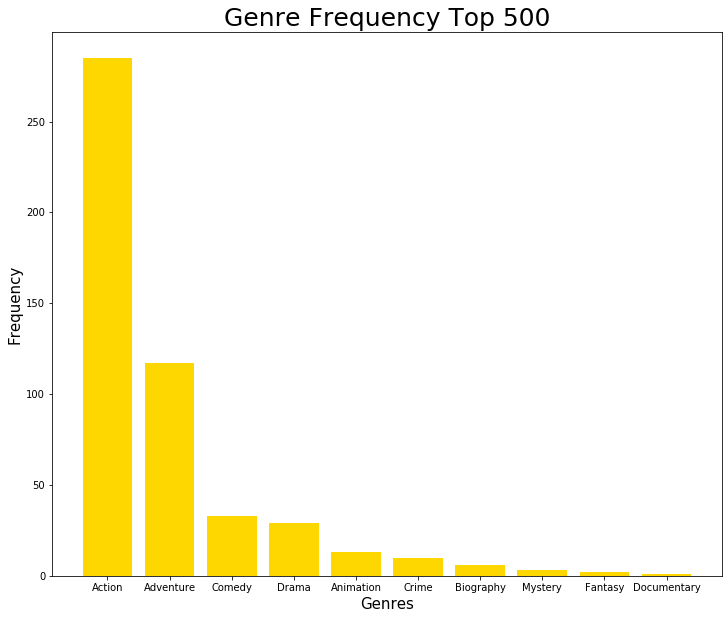

In [568]:
x= ["Action" ,"Adventure", "Comedy", "Drama", "Animation", "Crime", "Biography", "Mystery", "Fantasy", "Documentary"]
y= [285, 117, 33, 29, 13, 10, 6, 3, 2, 1]

plt.figure(figsize=(12,10))
plt.bar(x, y, color = "Gold")

plt.title("Genre Frequency Top 500", size=25)
plt.xlabel('Genres', size=15)
plt.ylabel('Frequency', size= 15)

plt.show()


# The Max Gross For  Top 5 Genres

In [513]:
# We want to see what's the maximum made from each genre

act_max = gen_gros[(gen_gros['genres']) == ('Action')].max().astype(str)[1]

adv_max = gen_gros[(gen_gros['genres']) == ('Adventure')].max().astype(str)[1]

com_max = gen_gros[(gen_gros['genres']) == ('Comedy')].max().astype(str)[1]

dra_max = gen_gros[(gen_gros['genres']) == ('Drama')].max().astype(str)[1]

ani_max = gen_gros[(gen_gros['genres']) == ('Animation')].max().astype(str)[1]

In [514]:
gross_list = [act_max, adv_max, com_max, dra_max, ani_max]
gross_list

['760505847', '424645577', '260031035', '658672302', '206435493']

In [515]:
genres_list = ["Action", "Adventure", "Comedy", "Drama", "Animation"]
genres_list

['Action', 'Adventure', 'Comedy', 'Drama', 'Animation']

In [516]:
# Creating a DataFrame to help us visualize this max gross better

gen_max_df = pd.DataFrame({'Genres': genres_list, 'Max Gross': gross_list})
gen_max_df

,Genres,Max Gross
0,Action,760505847
1,Adventure,424645577
2,Comedy,260031035
3,Drama,658672302
4,Animation,206435493


In [267]:
gen500 = clean_df.loc[:499,'genres']
gross500 = clean_df.loc[:499,'gross']

In [466]:
names = genres_list

In [463]:
values = []

for string in gross_list:
    num = int(string)
    values.append(num)
    
values

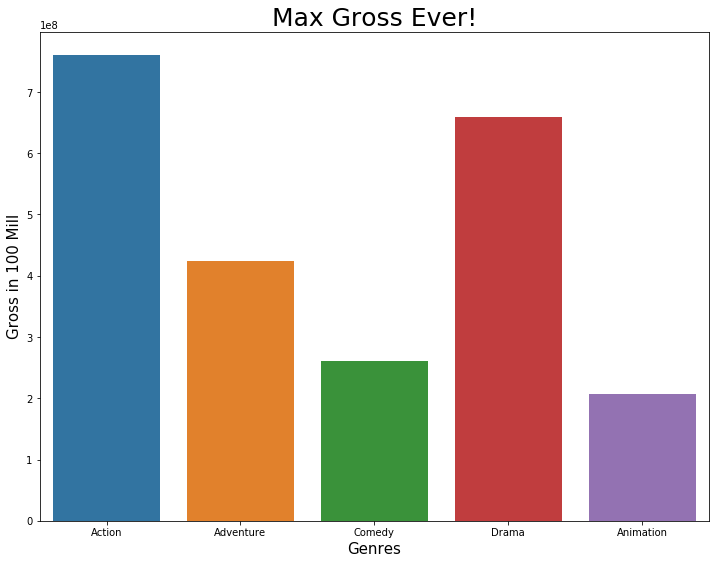

In [556]:
plt.figure(figsize=(12,9))

sns.barplot(x=names, y=values)
plt.title("Max Gross Ever!", size=25)
plt.xlabel('Genres', size=15)
plt.ylabel('Gross in 100 Mill', size= 15)

plt.show()

# Top 500 Genres IMDB Scores

In [364]:
# Lets find out frequent a genre pops up in this top 500
gen = gen_gros['genres'].head(499)
gen_count = gen_gros['genres'].head(499).value_counts()

In [552]:
# Lets grab the IMDB Scores for all 500 films
# imdbsco = 
imdb_scores = clean_df.loc[:499, ['genres', 'imdb_score']]

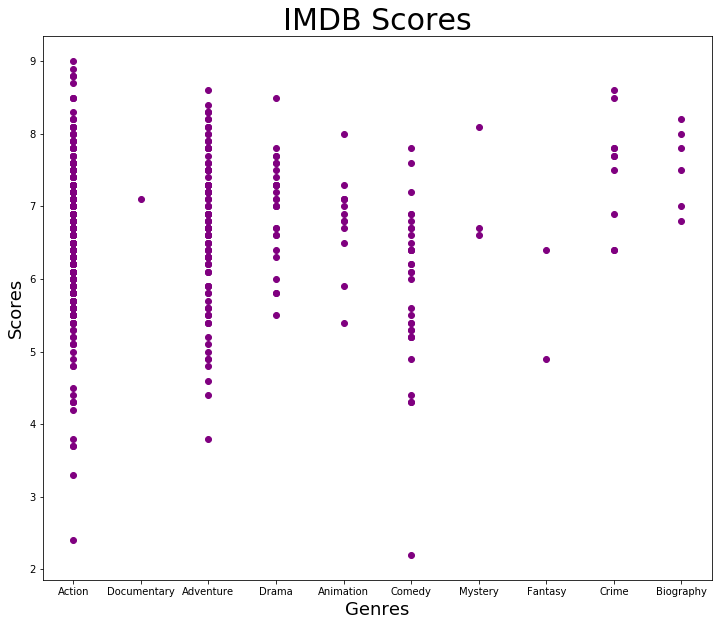

In [543]:

x = gen500
y = imdbsco

plt.figure(figsize=(12,10))
plt.scatter(x,y, c='purple')
area = (20)
plt.title("IMDB Scores", size=30)
plt.xlabel('Genres', size=18)
plt.ylabel('Scores', size= 18)

plt.show()